In [67]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import os
import csv
import gensim
from sklearn.externals import joblib
import torch.nn.functional as F
import torch.nn as nn
import torch
# Store genism model for getting n similar words eventually
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from Neighbour import get_neighbours
import sklearn
import matplotlib.pyplot as plt
MALE = """driver
supervisor
janitor
cook
mover
laborer
construction worker
chief
developer
carpenter
manager
lawyer
farmer
salesperson
physician
guard
analyst
mechanic
sheriff
CEO
"""
FEMALE = """
attendant
cashier
teacher
nurse
assistant
secretary
auditor
cleaner
receptionist
clerk
counselor
designer
hairdresser
writer
housekeeper
baker
accountant
editor
librarian
tailor
"""

In [230]:
words = ["he", "his", "He", "her", "she", "him", "She", "man", "women", "men", "His", "woman", "spokesman", "wife", "himself", "son", "mother", "father", "chairman", "daughter", "husband", "guy", "girls", "girl", "Her", "boy", "King", "boys", "brother", "Chairman", "spokeswoman", "female", "sister", "Women", "Man", "male", "herself", "Lions", "Lady", "brothers", "dad", "actress", "mom", "sons", "girlfriend", "Kings", "Men", "daughters", "Prince", "Queen", "teenager", "lady", "Bulls", "boyfriend", "sisters", "Colts", "mothers", "Sir", "king", "businessman", "Boys", "grandmother", "grandfather", "deer", "cousin", "Woman", "ladies", "Girls", "Father", "uncle", "PA", "Boy", "Councilman", "mum", "Brothers", "MA", "males", "Girl", "Mom", "Guy", "Queens", "congressman", "Dad", "Mother", "grandson", "twins", "bull", "queen", "businessmen", "wives", "widow", "nephew", "bride", "females", "aunt", "Congressman", "prostate_cancer", "lesbian", "chairwoman", "fathers", "Son", "moms", "Ladies", "maiden", "granddaughter", "younger_brother", "Princess", "Guys", "lads", "Ma", "Sons", "lion", "Bachelor", "gentleman", "fraternity", "bachelor", "niece", "Lion", "Sister", "bulls", "husbands", "prince", "colt", "salesman", "Bull", "Sisters", "hers", "dude", "Spokesman", "beard", "filly", "Actress", "Him", "princess", "Brother", "lesbians", "councilman", "actresses", "Viagra", "gentlemen", "stepfather", "Deer", "monks", "Beard", "Uncle", "ex_girlfriend", "lad", "sperm", "Daddy", "testosterone", "MAN", "Female", "nephews", "maid", "daddy", "mare", "fiance", "Wife", "fiancee", "kings", "dads", "waitress", "Male", "maternal", "heroine", "feminist", "Mama", "nieces", "girlfriends", "Councilwoman", "sir", "stud", "Mothers", "mistress", "lions", "estranged_wife", "womb", "Brotherhood", "Statesman", "grandma", "maternity", "estrogen", "ex_boyfriend", "widows", "gelding", "diva", "teenage_girls", "nuns", "Daughter", "czar", "ovarian_cancer", "HE", "Monk", "countrymen", "Grandma", "teenage_girl", "penis", "bloke", "nun", "Husband", "brides", "housewife", "spokesmen", "suitors", "menopause", "monastery", "patriarch", "Beau", "motherhood", "brethren", "stepmother", "Dude", "prostate", "Moms", "hostess", "twin_brother", "Colt", "schoolboy", "eldest", "brotherhood", "Godfather", "fillies", "stepson", "congresswoman", "Chairwoman", "Daughters", "uncles", "witch", "Mommy", "monk", "viagra", "paternity", "suitor", "chick", "Pa", "fianc\u00e9", "sorority", "macho", "Spokeswoman", "businesswoman", "eldest_son", "gal", "statesman", "schoolgirl", "fathered", "goddess", "hubby", "mares", "stepdaughter", "blokes", "dudes", "socialite", "strongman", "Witch", "fianc\u00e9e", "uterus", "grandsons", "Bride", "studs", "mama", "Aunt", "godfather", "hens", "hen", "mommy", "Babe", "estranged_husband", "Fathers", "elder_brother", "boyhood", "baritone", "Diva", "Lesbian", "grandmothers", "grandpa", "boyfriends", "feminism", "countryman", "stallion", "heiress", "queens", "Grandpa", "witches", "aunts", "semen", "fella", "granddaughters", "chap", "knight", "widower", "Maiden", "salesmen", "convent", "KING", "vagina", "beau", "babe", "HIS", "beards", "handyman", "twin_sister", "maids", "gals", "housewives", "Gentlemen", "horsemen", "Businessman", "obstetrics", "fatherhood", "beauty_queen", "councilwoman", "princes", "matriarch", "colts", "manly", "ma", "fraternities", "Spokesmen", "pa", "fellas", "Gentleman", "councilmen", "dowry", "barbershop", "Monks", "WOMAN", "fraternal", "ballerina", "manhood", "Dads", "heroines", "granny", "gynecologist", "princesses", "Goddess", "yo", "Granny", "knights", "eldest_daughter", "HER", "underage_girls", "masculinity", "Girlfriend", "bro", "Grandmother", "grandfathers", "crown_prince", "Restless", "paternal", "Queen_Mother", "Boyfriend", "womens", "Males", "SHE", "Countess", "stepchildren", "Belles", "bachelors", "matron", "momma", "Legs", "maidens", "goddesses", "landlady", "sisterhood", "Grandfather", "Fraternity", "Majesty", "Babes", "lass", "maternal_grandmother", "blondes", "ma'am", "Womens", "divorcee", "Momma", "fathering", "Effie", "Lad", "womanhood", "missus", "Sisterhood", "granddad", "Mens", "papa", "gf", "sis", "Husbands", "Hen", "womanizer", "gynecological", "stepsister", "Handsome", "Prince_Charming", "BOY", "stepdad", "teen_ager", "GIRL", "dame", "Sorority", "beauty_pageants", "raspy", "harem", "maternal_grandfather", "Hes", "deliveryman", "septuagenarian", "damsel", "paternal_grandmother", "paramour", "paternal_grandparents", "Nun", "DAD", "mothering", "shes", "HE_'S", "Nuns", "teenage_daughters", "auntie", "widowed_mother", "Girlfriends", "FATHER", "virile", "COUPLE", "grandmas", "Hubby", "nan", "vixen", "Joan_Crawford", "stepdaughters", "endometrial_cancer", "stepsons", "loins", "Grandson", "Mitchells", "erections", "Matron", "Fella", "daddies", "ter", "Sweetie", "Dudes", "Princesses", "Lads", "lioness", "Mamma", "virility", "bros", "womenfolk", "Heir", "BROTHERS", "manliness", "patriarchs", "earl", "sisterly", "Whore", "Gynaecology", "countess", "convents", "Oratory", "witch_doctor", "mamas", "yah", "aunty", "aunties", "Heiress", "lasses", "Breasts", "fairer_sex", "sorority_sisters", "WIFE", "Laurels", "penile", "nuh", "mah", "toms", "mam", "Granddad", "premenopausal_women", "Granddaddy", "nana", "coeds", "dames", "herdsman", "Mammy", "Fellas", "Niece", "menfolk", "Grandad", "bloods", "Gramps", "damsels", "Granddaughter", "mamma", "concubine", "Oros", "Blarney", "filial", "broads", "Ethel_Kennedy", "ACTRESS", "Tit", "fianc", "Hunk", "Night_Shift", "wifey", "Lothario", "Holy_Roman_Emperor", "horse_breeder", "grandnephew", "Lewises", "Muscular", "feminist_movement", "Sanan", "women\u00e2_\u20ac_\u2122", "Fiancee", "dowries", "Carmelite", "rah", "n_roller", "bay_filly", "belles", "Uncles", "PRINCESS", "womans", "Homeboy", "Blokes", "Charmer", "codger", "Delta_Zeta", "courtesans", "grandaughter", "SISTER", "Highness", "grandbabies", "crone", "Skip_Away", "noblewoman", "bf", "jane", "philandering_husband", "Sisqo", "mammy", "daugher", "director_Skip_Bertman", "DAUGHTER", "Royal_Highness", "mannish", "spinsters", "Missus", "madame", "Godfathers", "saleswomen", "beaus", "Risha", "luh", "sah", "negligee", "Women\u00e2_\u20ac_\u2122", "Hos", "salesgirl", "grandmom", "Grandmas", "Lawsons", "countrywomen", "Booby", "darlin", "Sheiks", "boyz", "wifes", "Bayi", "Il_Duce", "\u00e2_\u20ac_\u0153My", "fem", "daugther", "Potti", "hussy", "tch", "Gelding", "stemmed_roses", "Damson", "puh", "Tylers", "neice", "Mutha", "GRANDMOTHER", "youse", "spurned_lover", "mae", "Britt_Ekland", "clotheshorse", "Carlita_Kilpatrick", "Cambest", "Pretty_Polly", "banshees", "male_chauvinist", "Arliss", "mommas", "maidservant", "Gale_Harold", "Little_Bo_Peep", "Cleavers", "hags", "blowsy", "Queen_Elizabeth_I.", "lassies", "papas", "BABE", "ugly_ducklings", "Jims", "hellion", "Beautician", "coalminer", "relaxin", "El_Mahroug", "Victoria_Secret_Angel", "shepherdess", "Mosco", "Slacks", "nanna", "wifely", "tomboys", "LAH", "hast", "apo", "Kaplans", "milkmaid", "Robin_Munis", "John_Barleycorn", "royal_highness", "Meanie", "NAH", "trollop", "roh", "Jewess", "Sheik_Hamad", "mumsy", "Big_Pussy", "chil_dren", "Aunt_Bea", "basso", "sista", "girlies", "nun_Sister", "chica", "Bubbas", "massa", "Southern_belles", "Nephews", "castrations", "Mister_Ed", "Grandsons", "Calaf", "Malachy_McCourt", "Shamash", "hey_hey", "Harmen", "sonofabitch", "Donovans", "Grannie", "Kalinka", "hisself", "Devean", "goatherd", "hinds", "El_Corredor", "Kens", "notorious_womanizer", "goh", "Mommas", "washerwoman", "Samaira", "Coo_Coo", "Governess", "grandsire", "PRINCE_WILLIAM", "gramma", "him.He", "Coptic_priest", "Corbie", "Kennys", "thathe", "Pa_Pa", "Bristols", "Hotep", "snowy_haired", "El_Prado_Ire", "Girl_hitmaker", "Hurleys", "St._Meinrad", "sexually_perverted", "authoress", "Prudie", "raven_haired_beauty", "Bonos", "domestic_shorthair", "brothas", "nymphet", "Neelma", "Seita", "stud_muffin", "St._Judes", "yenta", "bare_shouldered", "Pinkney_Sr.", "PRINCE_CHARLES", "Bisutti", "sistas", "Blanche_Devereaux", "Momoa", "Quiff", "Scotswoman", "balaclava_clad_men", "Louis_Leakey", "dearie", "vacuum_cleaner_salesman", "grandads", "postulant", "SARAH_JESSICA_PARKER", "AUNT", "Prince_Dauntless", "Dalys", "Darkie", "Czar_Nicholas", "Lion_Hearted", "Boy_recliner", "baby_mamas", "giantess", "Lawd", "GRANNY", "fianc_e", "Bilqis", "WCTU", "famly", "Ellas", "feminazis", "Pentheus", "MAMAS", "Town_Criers", "Saggy", "youngman", "grandam", "divorc\u00e9", "bosomed", "roon", "Simmentals", "eponymous_heroine", "LEYLAND", "REE'", "cain't", "Evelynn", "WAH'", "sistah", "Horners", "Elsie_Poncher", "Coochie", "rat_terriers", "Limousins", "Buchinski", "Schicchi", "Carpitcher", "Khwezi", "HAH'", "Shazza", "Mackeson", "ROH'", "kuya", "novice_nun", "Shei", "Elmasri", "ladykiller", "6yo", "Yenta", "SHEL", "pater", "Souse", "Tahirah", "comedian_Rodney_Dangerfield", "Shottle", "carryin", "Sath", "fa'afafine", "royal_consort", "hus_band", "maternal_uncles", "dressing_provocatively", "dreamgirl", "millionaire_industrialist", "Georgie_Girl", "Must_Be_Obeyed", "joh", "Arabian_stallion", "ahr", "mso_para_margin_0in", "SOO'", "Biddles", "Chincoteague_Volunteer_Fire", "Lisa_Miceli", "gorgeous_brunette", "fianc\u017d", "Moved_fluently", "Afternoon_Deelites", "biker_dude", "Vito_Spatafore", "MICK_JAGGER", "Adesida", "Reineman", "witz", "Djamila", "Glenroe", "daddys", "Romanzi", "gentlewomen", "Dandie_Dinmont_terrier", "Excess_Ire", "By_SYVJ_Staff", "zan", "CONFESSIONS", "Magees", "wimmin", "tash", "Theatrical_Ire", "Prince_Charmings", "chocolate_eclair", "bron", "daughers", "Felly", "fiftyish", "Spritely", "GRANDPA", "distaffer", "Norbertines", "DAH'", "leader_Muammar_Gadaffi", "swains", "Prince_Tomohito", "Honneur", "Soeur", "jouster", "Pharaoh_Amenhotep_III", "QUEEN_ELIZABETH_II", "Ne'er", "Galileo_Ire", "Fools_Crow", "Lannisters", "Devines", "gonzales", "columnist_Ann_Landers", "Moseleys", "hiz", "busch", "roastee", "toyboys", "Sheffields", "grandaunt", "Galvins", "Giongo", "geh", "flame_haired_actress", "Grammarian", "Greg_Evigan", "frontierswoman", "Debele", "rabs", "nymphets", "aai", "BREE", "Shaqs", "ZAY", "pappa", "Housa", "refrigerator_repairman", "artificial_inseminations", "chickie", "Rippa", "teenager_Tracy_Turnblad", "homebred_colt", "Abigaille", "hen_pecked_husband", "businesman", "her.She", "Kaikeyi", "Stittsworth", "self_proclaimed_redneck", "Khella", "NeW", "Evers_Swindell", "Asmerom_Gebreselassie", "Boy_recliners", "Cliff_Claven", "Legge_Bourke", "Costos", "d'_honneur", "sistahs", "Cabble", "sahn", "CROW_AGENCY_Mont", "jezebel", "Harrolds", "ROSARIO_DAWSON", "INXS_frontman_Michael_Hutchence", "Gursikh", "Dadas", "VIAGA", "keen_horsewoman", "Theodoric", "Eldery", "lihn", "Alice_Kramden", "Santarina", "radical_cleric_al_Sadr", "Curleys", "SY'", "Fidaa", "Saptapadi", "Actor_Sean_Astin", "Kellita_Smith", "Doly", "Libertina", "Money_McBags", "Chief_Bearhart", "choirgirl", "chestnut_stallion", "VIGRA", "BY_JIM_McCONNELL", "Sal_Vitale", "Trivia_buffs", "kumaris", "fraternal_lodge", "galpals", "Borino_Quinn", "lina", "LATEST_Rapper", "Bezar", "Manro", "bakla", "Grisetti", "blond_bimbo", "spinster_aunt", "gurls", "hiswife", "paleface", "Charlye", "hippie_chicks", "Khalifas", "Picture_JUSTIN_SANSON", "Hepburns", "yez", "ALDER", "Sanussi", "Lil_Sis", "McLoughlins", "Barbra_Jean", "Lulua", "thatshe", "actress_Shohreh_Aghdashloo", "SIR_ANTHONY_HOPKINS", "Gloddy", "ZAH'", "ORANGE_'S", "Danielle_Bimber", "grandmum", "Kulkis", "Brazington", "Marisa_Lenhard_CFA", "SIR_JOHN", "Clareman", "Aqila", "Heavily_tattooed", "Libbys", "thim", "elocutionist", "submissives", "Inja", "rahm", "Agnes_Gooch", "fake_tits", "nancy_boys", "Swaidan", "SHAH'", "ain'ta_bed", "Shumail_Raj", "Duchesse", "diethylstilbestrol_DES", "colt_foal", "unfaithful_lover", "Maseri", "nevah", "SAHN", "Barths", "Toughkenamon", "GUEST_STARS", "him.But", "Donna_Claspell", "gingham_dresses", "Massage_Parlour", "wae", "Wasacz", "Magistra", "vihl", "Smriti_Iraani", "boyish_haircut", "workingwoman", "borthers", "Capuchin_friars", "Nejma", "yes_sirs", "bivocational_pastor", "Grafters", "HOPWOOD", "Nicknamed_Godzilla", "yos", "Berkenfield", "Missis", "sitcom_Designing_Women", "Kafoa", "trainer_Emma_Lavelle", "sadomasochistic_dungeon", "iht", "desperates", "predessor", "wolf_cub", "indigenous_Peruvians", "Livia_Soprano", "troh", "colt_sired", "BOND_HILL", "ihl", "Drydens", "rahs", "Piserchia", "Sonny_Corinthos", "bankrobber", "Fwank", "feisty_redhead", "booze_guzzling", "COOPERS", "actress_Q'orianka_Kilcher", "Cortezar", "twe", "Jacoub", "Cindy_Iannarelli", "Hell_Raiser", "Fondly_referred", "Bridal_Shoppe", "Noleta", "Christinas", "IAGRA", "LaTanya_Richardson", "Sang_Bender", "Assasins", "sorrel_gelding", "septugenarian", "Hissy", "Muqtada_al_Sadr_mook", "Pfeni", "MADRID_AFX_Banco_Santander", "tuchis", "LeVaughn", "Gadzicki", "transvestite_hooker", "Fame_jockey_Laffit", "nun_Sister_Mary", "SAMSONOV", "Mayflower_Madam", "Shaque", "well.He", "Trainer_Julio_Canani", "sorrel_mare", "minivehicle_joint_venture", "wife_Dwina", "Aasiya_AH'_see", "Baratheon", "Rick_O'Shay", "Mammies", "goatie", "Nell_Gwynne", "charmingly_awkward", "Slamma", "DEHL", "Lorenzo_Borghese", "ALMA_Wis.", "Anne_Scurria", "father_Peruvians_alternately", "JULIE_ANDREWS", "Slim_Pickins", "Victoria_Secret_stunner", "BY'", "Sanam_Devdas", "pronounced_luh", "Pasha_Selim", "\u4e2d\u534e", "rson", "maternal_grandmothers", "IOWA_CITY_Ia", "Madame_de_Tourvel", "JAY'", "Sheika_Mozah_bint_Nasser", "Hotsy_Totsy", "D'_Ginto", "singer_Johnny_Paycheck", "uterine_prolapse_surgery", "SCOTTDALE_Pa.", "AdelaideNow_reports", "Marcus_Schenkenberg", "Clyse", "Obiter_Dicta", "comic_Sam_Kinison", "bitties", "ROCKVILLE_Ind.", "swimsuit_calendars", "Decicio_Smith", "Ma_ma", "Rie_Miyazawa", "celibate_chastity", "gwah", "ZAY'", "HER_Majesty", "Defrere", "Las_Madrinas", "\u7c3f_\u8042_\u7ffb", "Bea_Hamill", "ARCADIA_Calif._Trainer", "Bold_Badgett", "stakes_victress", "Hoppin_Frog", "Narumiya", "Flayfil", "hardman_Vinnie_Jones", "Marilyn_Monroe_lookalike", "Kivanc_Tatlitug", "Persis_Khambatta", "SINKING_SPRING_Pa.", "len_3rd", "DEAR_TRYING", "Farndon_Cheshire", "Krishna_Madiga", "daughter_Princess_Chulabhorn", "Marshall_Rooster_Cogburn", "Kitty_Kiernan", "Yokich", "Jarou", "Serdaris", "ee_ay", "Montifiore", "Chuderewicz", "Samuel_Le_Bihan", "filly_Proud_Spell", "Umm_Hiba", "pronounced_koo", "Sandy_Fonzo", "KOR'", "Fielder_Civil_kisses", "Federalsburg_Maryland", "Nikah_ceremony", "Brinke_Stevens", "Yakama_Tribal_Council", "Capuchin_Father", "wife_Callista_Bisek", "Beau_Dare", "Bedoni", "Arjun_Punj", "JOHNNY_KNOXVILLE", "cap_tain", "Alderwood_Boys", "Chi_Eta_Phi", "ringleader_Charles_Graner", "Savoies", "Lalla_Salma", "Mrs._Potiphar", "fahn", "name_Taylor_Sumers", "Vernita_Green", "Bollywood_baddie", "BENBROOK_Texas", "Assemblyman_Lou_Papan", "virgin_brides", "Cho_Eun", "CATHY_Freeman", "Uncle_Saul", "Lao_Brewery", "Ibo_tribe", "ruf", "rival_Edurne_Pasaban", "Hei_Shangri_La", "Mommy_dearest", "interest_Angola_Sonogal", "Ger_Monsun", "PUSSYCAT_DOLL", "Crown_Jewels_Condoms", "Lord_Marke", "Patootie", "Nora_Bey", "huntin_shootin", "Minister_Raymond_Tshibanda", "La_Nina_la_NEEN", "signature_Whoppers", "estranged_hubby_Kevin_Federline", "UR'", "pill_poppin", "GEHR'", "purebred_Arabians", "husbandly_duties", "VIAGRA_TIMING", "Hereford_heifer", "hushed_monotone_voice", "Pola_Uddin", "Wee_Jimmy_Krankie", "Kwakwanso", "Our_Galvinator", "shoh", "Codependency_Anonymous_Group", "LA'", "Taufa'ahau", "Invincible_Spirit_colt", "SAH'_dur", "MOUNT_CARMEL_Pa.", "watches_attentively", "SNL_spinoffs", "Seth_Nitschke", "Duns_Berwickshire", "defendant_Colleen_LaRose", "Silky_O'Sullivan", "Highcliff_Farm", "REN'", "Comestar", "Satisfied_Frog", "Jai_Maharashtra", "ATTICA_Ind.", "lover_Larry_Birkhead", "Tami_Megal", "chauvinist_pigs", "Phi_sorority", "Micronesian_immigrant", "Lia_Boldt", "Sugar_Tits", "actress_Kathy_Najimy", "zhoo", "Colombo_underboss", "Katsav_accusers", "Bess_Houdini", "rap_mogul_Diddy", "companions_Khin_Khin", "Van_Het", "Mastoi_tribe", "VITALY", "ROLLING_STONES_rocker", "womanizing_cad", "LILY_COLE", "paternal_grandfathers", "Lt._Col._Kurt_Kosmatka", "Kasseem_Jr.", "Ji_Ji", "Wilburforce", "VIAGRA_DOSE", "English_Sheepdogs", "pronounced_Kah", "Htet_Htet_Oo", "Brisk_Breeze", "Eau_du", "BY_MELANIE_EVANS", "Neovasc_Medical", "British_funnyman_RICKY", "4YO_mare", "Hemaida", "MONKTON", "Mrs_Mujuru", "BaGhana_BaGhana", "Shaaban_Abdel_Rahim", "Edward_Jazlowiecki_lawyer", "Ajman_Stud", "manly_pharaoh_even", "Serra_Madeira_Islands", "FRAY'", "panto_dames", "Khin_Myo", "dancer_Karima_El_Mahroug", "CROWN_Princess", "Baseball_HOFer", "Hasta_la_Pasta", "GIRLS_NEXT_DOOR", "Benedict_Groeschel", "Bousamra", "Ruby_Rubacuori_Ruby", "Monde_Bleu", "Un_homme_qui", "Taylor_Sumers", "Rapper_EMINEM", "Joe_Menchetti", "VAY'", "supermodel_NAOMI_CAMPBELL", "Supermodel_GISELE_BUNDCHEN", "Au_Lait", "Radar_Installed", "THOMAS_TOWNSHIP_Mich.", "Rafinesque", "Herman_Weinrich", "Abraxas_Antelope", "raspy_voiced_rocker", "Manurewa_Cosmopolitan_Club", "Paraone", "THE_LEOPARD", "Boy_Incorporated_LZB", "Dansili_filly", "Lumpy_Rutherford", "unwedded_bliss", "Bhavna_Sharma", "Scarvagh", "en_flagrante", "Mottu_Maid", "Dowager_Queen", "NEEN", "model_Monika_Zsibrita", "ROSIE_PEREZ", "Mattock_Ranger", "Valorous", "Surpreme", "Marwari_businessmen", "Grandparents_aunts", "Kimberley_Vlaeminck", "Lyn_Treece_Boys", "PDX_Update", "Virsa_Punjab", "eyelash_fluttering", "Pi_fraternity", "HUNTLEIGH_Mo.", "novelist_Jilly_Cooper", "Naha_Shuri_temple", "Yasmine_Al_Massri", "Mu_Gamma_Xi", "Mica_Ertegun", "Ocleppo", "VIAGRA_CONTRAINDICATIONS", "daughter_PEACHES", "trainer_Geoff_Wragg", "OVERNIGHT_DELIVERY", "Fitts_retiree", "de_Tourvel", "Lil_Lad", "north_easterner", "Aol_Weird_News", "Somewhat_improbably", "Sikh_panth", "Worcester_2m_7f", "Zainab_Jah", "OLYMPIC_medalist", "Enoch_Petrucelly", "collie_Lassie", "LOW'", "clumsiness_Holloway", "ayr", "OHR'", "ROLLING_STONES_guitarist", "LAH'_nee", "Ian_Beefy_Botham", "Awapuni_trainer", "Glamorous_Granny", "Chiang_Ching", "MidAtlantic_Cardiovascular_Associates", "Yeke", "Seaforth_Huron_Expositor", "Westley_Cary_Elwes", "Cate_Blanchett_Veronica_Guerin", "Bellas_Gate", "witch_Glinda", "wives_mistresses", "Woodsville_Walmart", "2YO_colt", "Manav_Sushant_Singh", "Pupi_Avati_Il", "Sigma_Beta_Rho", "Bishop_Christopher_Senyonjo", "Vodou_priest", "Rubel_Chowdhury", "Claddagh_Ring", "TAH'_duh_al", "al_Sadr_mook_TAH'", "ROBIN_GIBB", "GAHN'", "BY_THOMAS_RANSON", "sister_Carine_Jena", "Lyphard_mare", "summa_cum", "Semenya_grandmother_Maputhi", "Clare_Nuns", "Talac", "sex_hormones_androgens", "majeste", "Saint_Ballado_mare", "Carrie_Huchel", "Mae_Dok", "wife_Dieula", "Earnest_Sirls", "spoof_bar_mitzvah", "von_Boetticher", "Audwin_Mosby", "Case_presentationWe", "Vincent_Papandrea", "KRAY'", "Sergi_Benavent", "Le_Poisson", "Von_Cramm", "Patti_Mell", "Raymi_Coya", "Benjamin_BeBe_Winans", "Nana_Akosua", "Auld_Acquaintance", "Desire_Burunga", "Company_Wrangler_Nestea", "ask_Krisy_Plourde", "JUANITA_BYNUM", "livia", "GAMB", "Gail_Rosario_Dawson", "Ramgarhia_Sikh", "Catholic_nun_Sister", "FOUR_WEDDINGS_AND", "Robyn_Scherer", "brother_King_Athelstan", "Santo_Loquasto_Fences", "Wee_Frees", "MARISOL", "Soliloquy_Stakes", "Whatever_Spoetzl", "Marc'Aurelio", "mon_petit", "Sabbar_al_Mashhadani", "KAY'_lee", "m_zah_MAH'", "BY_TAMI_ALTHOFF", "hobbit_Samwise_Gamgee", "Bahiya_Hariri_sister", "daddy_Larry_Birkhead", "Sow_Tracey_Ullman", "coach_Viljo_Nousiainen", "Carmen_Lebbos", "conjoined_twins_Zainab", "Rob_Komosa", "ample_bosomed", "Ageing_rocker", "psychic_Oda"]

## WOrds

In [384]:
import random
male = open('malew.txt', 'r').read().split('\n')
female = open('femalew.txt', 'r').read().split('\n')
words = male + female
random.shuffle(words)

## Further

In [370]:
# VECTORS = joblib.load('embeddings_glove_large.pkl')

In [371]:
# words = (MALE+FEMALE).split()

In [372]:
# male_embeddings, female_embeddings = {}, {}
# for word in MALE.split():
#     male_embeddings[word] = VECTORS[word]
# for word in FEMALE.split():
#     female_embeddings[word] = VECTORS[word]    

In [393]:
word_embeddings = {}
reduced_words = []
for word in words:
    try:
        b = VECTORS[word]
        a = VECTORS['he'] - VECTORS['she']
#         np.dot(x, y) / (np.linalg.norm(x)*np.linalg.norm(y))
        magn = np.dot(a, b)/(np.linalg.norm(a)**2)
        projected = a * magn
        word_embeddings[word] = projected
        reduced_words.append(word)
    except:
        continue

In [396]:
tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=0)
Y = tsne.fit_transform(list(word_embeddings.values()))

In [397]:
x_coords = Y[:, 0]
y_coords = Y[:, 1]

In [398]:
 kmeans = KMeans(n_clusters=2, random_state=0,n_init =100).fit(Y)

In [399]:
len(kmeans.labels_)

389

In [400]:
len(c1x)

202

In [401]:
len(c2y)

187

In [402]:
c1x, c2x, c1y, c2y = [], [], [], []
mw, fw = [], []
for i, (y, w) in enumerate(zip(Y, reduced_words)):
    if kmeans.labels_[i]:
        mw.append(w)
        c1x.append(y[0])
        c1y.append(y[1])
    else:
        fw.append(w)
        c2x.append(y[0])
        c2y.append(y[1])

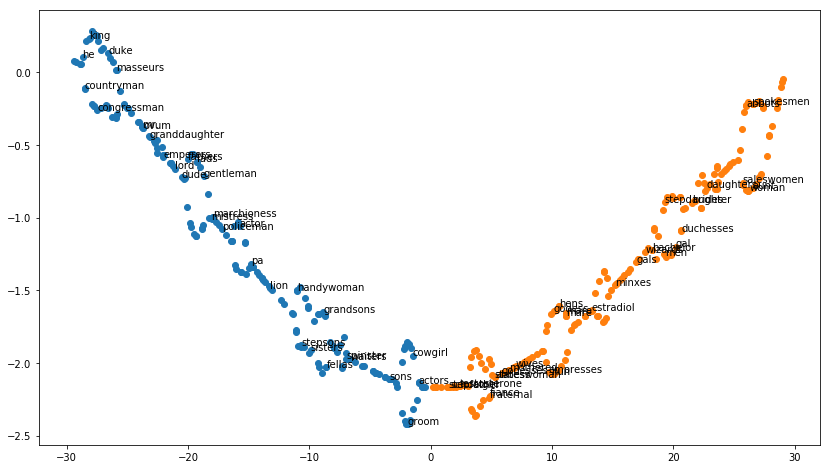

In [403]:
plt.figure(figsize=(14,8))
plt.scatter(c1x, c1y)
plt.scatter(c2x, c2y)
for i, (label, x, y) in enumerate(zip(mw, c1x, c1y)):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        if i > 30:
            break
for i, (label, x, y) in enumerate(zip(fw, c2x, c2y)):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        if i > 30:
            break            

In [404]:
c1x, c2x, c1y, c2y = [], [], [], []
mw, fw = [], []
for i, (y, w) in enumerate(zip(Y, reduced_words)):
    if w in male:
        mw.append(w)
        c1x.append(y[0])
        c1y.append(y[1])
    else:
        fw.append(w)
        c2x.append(y[0])
        c2y.append(y[1])

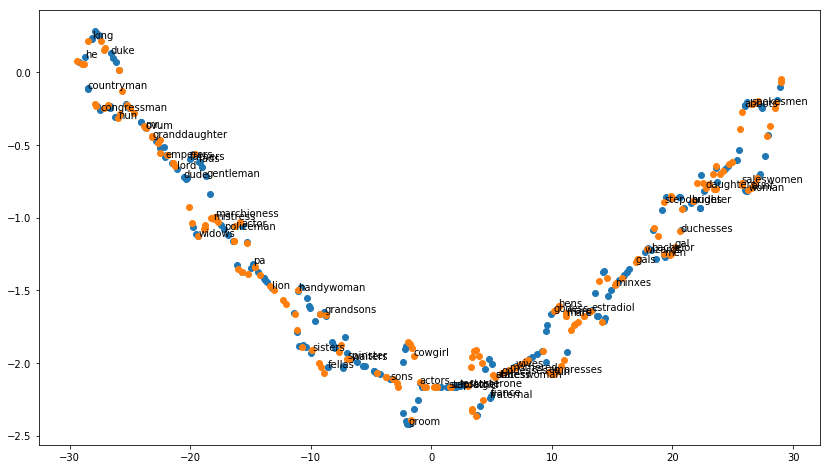

In [405]:
plt.figure(figsize=(14,8))
plt.scatter(c1x, c1y)
plt.scatter(c2x, c2y)
for i, (label, x, y) in enumerate(zip(mw, c1x, c1y)):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        if i > 30:
            break
for i, (label, x, y) in enumerate(zip(fw, c2x, c2y)):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        if i > 30:
            break            

# Get neighbours

In [134]:
def cosine_similarity(x, y):
    if type(x) is str:
        x = VECTORS[x]
    if type(y) is str:
        y = VECTORS[y]
    cos = np.dot(x, y) / (np.linalg.norm(x)*np.linalg.norm(y))
    return cos

def get_neighbours(word_list, max_neighbours):
    word_dict = {}
    neighbour_dict = dict(zip([str(i) for i in range(max_neighbours)], np.random.randint(-101,-100, size=(max_neighbours,))))
    for word in word_list:
        try:
            v1 = VECTORS[word]
        except:
            continue
        min_val = -100000
        for key in VECTORS:
            if key.lower() == word: continue
            cs = cosine_similarity(v1, VECTORS[key])
            if cs > min_val:
                goner = min(neighbour_dict, key=neighbour_dict.get)
                neighbour_dict[key] = neighbour_dict.pop(goner)
                neighbour_dict[key] = cs
                min_val = min(neighbour_dict.values())
        word_dict[word] = dict(sorted(neighbour_dict.items(), key=lambda neighbour_dict: neighbour_dict[1]))
        print(f"{word} done")
    return word_dict

In [135]:
near_dict = get_neighbours(words, 1000)

he done
his done
He done
her done
she done
him done
She done
man done
women done
men done
His done
woman done
spokesman done
wife done
himself done
son done
mother done
father done
chairman done
daughter done
husband done
guy done
girls done
girl done
Her done
boy done
King done
boys done
brother done
Chairman done
spokeswoman done
female done
sister done
Women done
Man done
male done
herself done
Lions done
Lady done
brothers done
dad done
actress done
mom done
sons done
girlfriend done
Kings done
Men done
daughters done
Prince done
Queen done
teenager done
lady done
Bulls done
boyfriend done
sisters done
Colts done
mothers done
Sir done
king done
businessman done
Boys done
grandmother done
grandfather done
deer done
cousin done
Woman done
ladies done
Girls done
Father done
uncle done
PA done
Boy done
Councilman done
mum done
Brothers done
MA done
males done
Girl done
Mom done
Guy done
Queens done
congressman done
Dad done
Mother done
grandson done
twins done
bull done
queen done
busi

carryin done
Sath done
fa'afafine done
dreamgirl done
joh done
ahr done
Biddles done
Reineman done
witz done
Djamila done
Glenroe done
daddys done
Romanzi done
gentlewomen done
zan done
CONFESSIONS done
Magees done
wimmin done
tash done
bron done
daughers done
Felly done
fiftyish done
Spritely done
GRANDPA done
Norbertines done
swains done
Honneur done
Soeur done
jouster done
Ne'er done
Lannisters done
Devines done
gonzales done
hiz done
busch done
toyboys done
Sheffields done
grandaunt done
Galvins done
geh done
Grammarian done
rabs done
nymphets done
aai done
BREE done
Shaqs done
ZAY done
pappa done
chickie done
Rippa done
Abigaille done
businesman done
her.She done
Kaikeyi done
Khella done
NeW done
Costos done
sistahs done
Cabble done
sahn done
jezebel done
Harrolds done
Gursikh done
Dadas done
Theodoric done
Eldery done
Curleys done
Saptapadi done
Doly done
Libertina done
choirgirl done
galpals done
lina done
Bezar done
Manro done
bakla done
Grisetti done
gurls done
hiswife done
pa

In [136]:
joblib.dump(near_dict, 'neighbours1440tsne.pkl') 

['neighbours1440tsne.pkl']

# Calculate new embeddings

In [153]:
from sklearn.externals import joblib

def get_neighbours(word, file):
    n = joblib.load(file)
    return list(n[word].keys())

def nearest_words(word, number):
    return get_neighbours(word, 'neighbours1440tsne.pkl')[-number:]


def cosine_similarity(X, male_vectors):
    return torch.matmul(male_vectors, X) /  (male_vectors.norm(dim=1) * X.norm(dim=0))

def objective(X, old_vec, near_vec, male_vectors, female_vectors, r):
    male_similarity = cosine_similarity(X, male_vectors)
    female_similarity = cosine_similarity(X, female_vectors)
    G = torch.abs(male_similarity - female_similarity).mean(dim=0)
    new_vec_localization = cosine_similarity(X, near_vec)
    old_vec_localization = cosine_similarity(old_vec, near_vec)
    M = torch.abs(new_vec_localization - old_vec_localization).mean(dim=0)
#     J = G + M
    J = r * G + (1 - r) * M #Do later #Later is now
    return J

def get_X(nfeatures=1, datapoints=300, low=-1, high=1):
    return torch.FloatTensor(np.random.uniform(low, high, size=(datapoints)))

class myModel(nn.Module):
    def __init__(self, X, old_vec, near_vec, male_vectors, female_vectors, r):
        super(myModel, self).__init__()
        self.old_vec = old_vec
        self.near_vec = near_vec
        self.male_vectors = male_vectors
        self.female_vectors = female_vectors
        self.X = nn.Parameter(X)
        self.r = r
        
    def forward(self):
        return  objective(self.X, self.old_vec, self.near_vec, self.male_vectors, self.female_vectors, self.r)
    
def minimize(lr, max_epochs, X, old_vec, near_vec, male_vectors, female_vectors, r, verbose=False):
    m = myModel(X, old_vec, near_vec, male_vectors, female_vectors, r)
    optimizer = torch.optim.Adam(m.parameters(), lr=lr)
    for epoch in range(max_epochs):
            optimizer.zero_grad()
            out = m.forward()
            out.backward()
            optimizer.step()
            if verbose:
                print(f"Epoch: {epoch} | objective: {out}")
    return m.X        

def get_new_word_embs(word, VECTORS, n, r, verbose=False):
    lr = 1e-1
    max_epochs = int(1e3)
    old_vec = torch.FloatTensor(VECTORS[word]).requires_grad_(True)
    X = get_X().requires_grad_(True)
    original_X = X.detach().clone()
    near_vec = torch.FloatTensor([VECTORS[l] for l in nearest_words(word, n)]).requires_grad_(True)
    male_vectors = torch.FloatTensor([VECTORS[word] for word in  ['male', 'man', 'he', 'husband', 'boy']]).requires_grad_(True)
    female_vectors = torch.FloatTensor([VECTORS[word] for word in ['female', 'woman', 'she', 'wife', 'girl']]).requires_grad_(True)
    updatedX = minimize(lr, max_epochs, X, old_vec, near_vec, male_vectors, female_vectors, r, verbose)
    return updatedX

def make_new_embeddings(wordlist, VECTOR, n, r=0.5):
    emb_list = ''
    for word in wordlist:
        try:
            emb = get_new_word_embs(word, VECTOR, n, r)
            emb = word + ' ' + ' '.join([str(i) for i in emb.detach().numpy()])
            emb_list += emb + '\n'
        except:
            continue
    return emb_list        

In [154]:
emb_list = make_new_embeddings(words, VECTORS, 990, 0.1)

In [156]:
with open("1400Wordembeddings.pkl", 'w') as handle:
    handle.write(emb_list)

In [157]:
def load_embedding(gloveFile):
    with open(gloveFile,'r', encoding="utf8") as f:
        model = {}
        for line in f:
            splitLine = line.split()
            word_end_index = len(splitLine) - 300 
            word = ' '.join(splitLine[0:word_end_index])
            embedding = np.array([float(val) for val in splitLine[-300:]])
            model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

# Plot new embs

In [ ]:
new_embs = load_embedding('1400Wordembeddings.pkl')

In [160]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(list(new_embs.values()))

In [161]:
c1x, c2x, c1y, c2y = [], [], [], []
for i, y in enumerate(Y):
    if kmeans.labels_[i]:
        c1x.append(y[0])
        c1y.append(y[1])
    else:
        c2x.append(y[0])
        c2y.append(y[1])

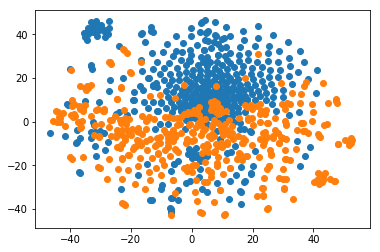

In [162]:
plt.scatter(c1x, c1y)
plt.scatter(c2x, c2y)

## Different values

In [177]:
emb_list2 = make_new_embeddings(words, VECTORS, 500, 0.1)
with open("1400Wordembeddings_500_01.pkl", 'w') as handle:
    handle.write(emb_list2)

In [178]:
def load_embedding(gloveFile):
    with open(gloveFile,'r', encoding="utf8") as f:
        model = {}
        for line in f:
            splitLine = line.split()
            word_end_index = len(splitLine) - 300 
            word = ' '.join(splitLine[0:word_end_index])
            embedding = np.array([float(val) for val in splitLine[-300:]])
            model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [179]:
new_embs2 = load_embedding('1400Wordembeddings_500_01.pkl')

Done. 808  words loaded!


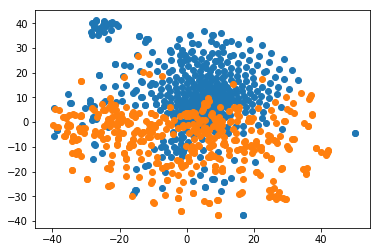

In [180]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(list(new_embs2.values()))
c1x, c2x, c1y, c2y = [], [], [], []
for i, y in enumerate(Y):
    if kmeans.labels_[i]:
        c1x.append(y[0])
        c1y.append(y[1])
    else:
        c2x.append(y[0])
        c2y.append(y[1])
plt.scatter(c1x, c1y)
plt.scatter(c2x, c2y)        

## More different values

In [181]:
emb_list3 = make_new_embeddings(words, VECTORS, 500, 0.9)
with open("1400Wordembeddings_500_09.pkl", 'w') as handle:
    handle.write(emb_list3)

In [182]:
new_embs2 = load_embedding('1400Wordembeddings_500_09.pkl')

Done. 806  words loaded!


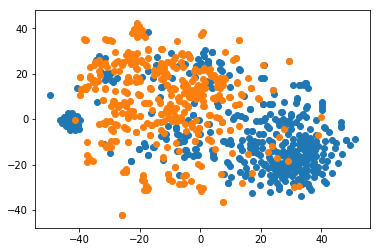

In [183]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(list(new_embs2.values()))
c1x, c2x, c1y, c2y = [], [], [], []
for i, y in enumerate(Y):
    if kmeans.labels_[i]:
        c1x.append(y[0])
        c1y.append(y[1])
    else:
        c2x.append(y[0])
        c2y.append(y[1])
plt.scatter(c1x, c1y)
plt.scatter(c2x, c2y)        